Simple logistic regression with pytorch, using only one layer

In [25]:
import torch
from torch import *
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the dataset from sklearn, and perform EDA

In [ ]:
bc = datasets.load_breast_cancer()

df = pd.DataFrame(bc.data, columns=bc.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [23]:
# the data consists of 569 rows and 30 features
print(df.shape)

# check for null values
print(df.isnull().sum())

corr = df.corr()
print(corr)

(569, 30)
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
                         mean radius  ...  worst fractal dimension
mean radius                 1.000000  ..

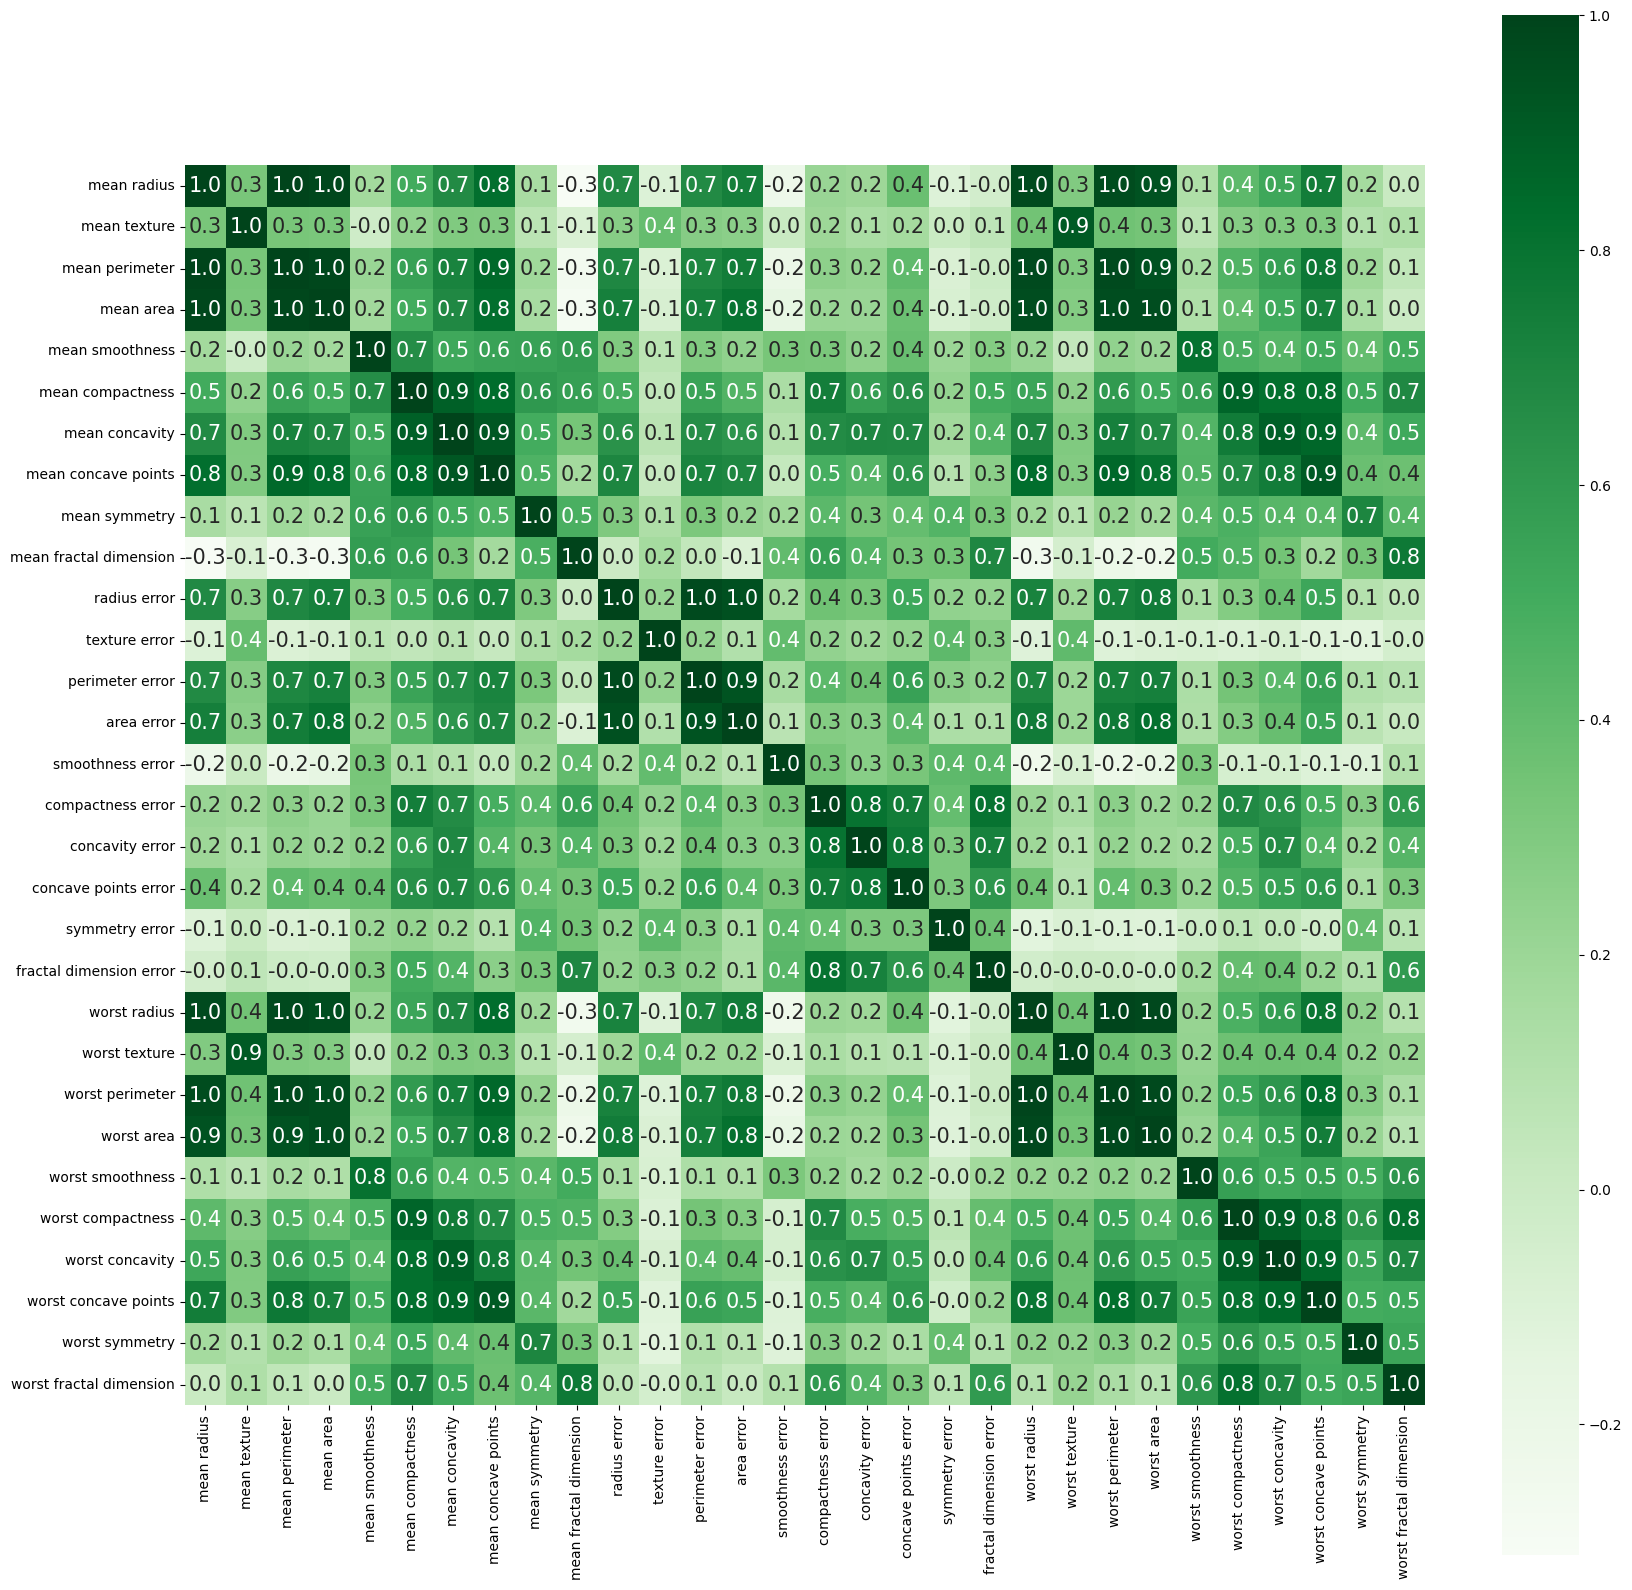

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

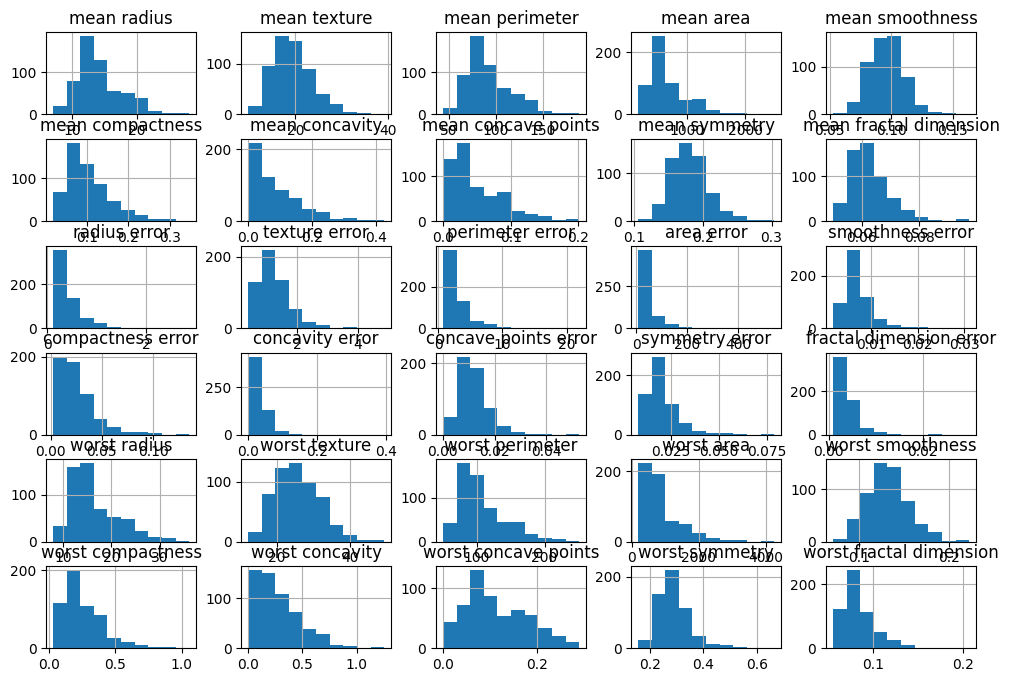

In [ ]:
df.hist(bins = 50, figsize=(12, 8))
plt.show()

In [37]:
X, y = bc.data, bc.target
n_samples, n_features = X.shape
# print(n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=1234)

unique, counts = np.unique(y, return_counts=True)
print("Full dataset distribution:", dict(zip(unique, counts)))
print("Proportions:", counts / counts.sum())

unique, counts = np.unique(y_train, return_counts=True)
print("Full dataset distribution:", dict(zip(unique, counts)))
print("Proportions:", counts / counts.sum())

unique, counts = np.unique(y_test, return_counts=True)
print("Full dataset distribution:", dict(zip(unique, counts)))
print("Proportions:", counts / counts.sum())

Full dataset distribution: {np.int64(0): np.int64(212), np.int64(1): np.int64(357)}
Proportions: [0.37258348 0.62741652]
Full dataset distribution: {np.int64(0): np.int64(170), np.int64(1): np.int64(285)}
Proportions: [0.37362637 0.62637363]
Full dataset distribution: {np.int64(0): np.int64(42), np.int64(1): np.int64(72)}
Proportions: [0.36842105 0.63157895]


Normalize training/testing sets using standard scaler

In [38]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#convert to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))